# Supervised Shallow Machine Learning: Linear Regression Model

<div class="alert alert-info" role="alert" 
     style="font-size: 1em; padding: 10px; margin: 10px 0; text-align: center;">
    
    Linear regression is a method that models the relationship between two variables using a straight line (y = mx + b). 
</div>

### Import Libraries including from `sklearn` for shallow ML

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Machine Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Data Plotting
import matplotlib.pyplot as plt

#ignorewarnings
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    Data Preprocessing
</div>

### Option 1 to Load CSV files containing variables -- pandas' `read_csv function`

In [2]:
# Data are imported in Dataframe format
SSH = pd.read_csv("cmems_training/cmems_mod_glo_phy_my_0.083deg_P1D-m_SSH.csv", comment='#') # tells pandas to ignore lines starting with '#'
SST = pd.read_csv("cmems_training/cmems_mod_glo_phy_my_0.083deg_P1D-m_SST.csv", comment='#')

In [3]:
# The UTC format that our dates (times) are currently in:
SSH['dates'] = pd.to_datetime(SSH['time'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True)

# Step1: convert to a more friendly format, add 'dates' as new column 
SSH['dates'] = SSH['dates'].dt.strftime('%Y-%m-%d %H:%M')
# Step2: Remove the times in this case as they contain no real information
SSH['dates'] = pd.to_datetime(SSH['dates'])
# Step3: Drop the now unnecessary 'time' column
SSH = SSH.drop(columns=['time'])

# Re-order your columns so date is still first
SSH = SSH[['dates','zos']]
# Display
# print(SSH.head(2))

In [4]:
# We can now combine these different vars to make a new df
df = pd.DataFrame({'Date':SSH['dates'], 'SSH':SSH['zos'], 'SST':SST['thetao']})
print(df.head(5))

        Date       SSH        SST
0 1993-01-01 -0.096133  25.840723
1 1993-01-02 -0.106815  25.672995
2 1993-01-03 -0.137028  25.314096
3 1993-01-04 -0.170598  25.159552
4 1993-01-05 -0.165105  25.166143


### Set the `predictor` and `target` variables (X, y)

In [5]:
X = df['SSH'].values # Independent var
X = X.reshape(-1, 1) # Reshape: (n, 1)
y = df['SST'].values # Target variable

# Check reshape worked:
print(X.shape, y.shape)

(10408, 1) (10408,)


### Split the data into two sets: `training` (80%) and `test` (20%)

In [6]:
# Split your dataset so 20% is set aside for testing (0.2) 
# Set random_state to ensure yr train-test split is always the same (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the 80% training: 20% testing split
print("Trainin set size:", X_train.shape[0])
print("Testing set size:",  X_test.shape[0])

Trainin set size: 8326
Testing set size: 2082


<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    
    Linear Regression Model
<div>

In [7]:
# Fit LinearRegression (lin_reg) model on training data
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Predict SST for train and test sets
y_train_pred= lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test )

# Print slope & intercept from linear regression (lin_reg) model
print(f"y = {lin_reg.coef_[0]:.2f}x + {lin_reg.intercept_:.2f}")

y = 12.43x + 28.36


#### Assess the Predicted Regression Line

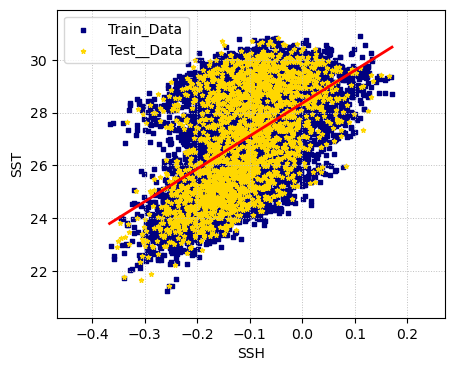

In [8]:
# Create figure
fig1, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot training (80%) and test (20%) datasets of SST
ax.scatter(X_train,y_train,marker='s', s=10, c='navy', label='Train_Data')
ax.scatter(X_test, y_test, marker='*', s=10, c='gold', label='Test__Data')

# Plot regression line in red (based on training fit)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = lin_reg.predict(X_range)
ax.plot(X_range, y_range_pred, linestyle='-', c='red', linewidth=2)

# Set axes limits
ax.set_xlim([df['SSH'].min() - 0.1, df['SSH'].max() + 0.1])
ax.set_ylim([df['SST'].min() - 1.0, df['SST'].max() + 1.0])

# Label axes
ax.set_xlabel('SSH')
ax.set_ylabel('SST')
ax.grid(True, color='silver', linestyle=':', linewidth=0.7)
ax.legend()
plt.show()

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    Evaluating Model Performance
</div>

### Metrics for Linear Regression Model: `R2` and `RMSE`

In [9]:
# Difference between true and predicted SST
diff = (y_test_pred - y_test)

# Create a new df with 'Modeled' vs 'Actual'
lin_df = pd.DataFrame({
    'Modeled': y_test_pred,
    'Actual' : y_test,
    'SST_diff': diff})

# Reset index to avoid misalignment in plotting
lin_df.reset_index(drop = True, inplace = True)
# Show lin_df
print(lin_df.head(3))

     Modeled     Actual  SST_diff
0  27.307141  28.435041 -1.127900
1  26.002194  29.601826 -3.599631
2  26.612940  25.901516  0.711424


In [10]:
# R², MSE, and RMSE for LinRegress:
r2  = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred, squared=False)
rmse= np.sqrt(mse)

# Print output
print(f"Linear Regression R²  : {r2:.2f}" )
print(f"Linear Regression MSE : {mse:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")

Linear Regression R²  : 0.29
Linear Regression MSE : 1.68
Linear Regression RMSE: 1.29


### Visualising Model Performance: simple `line plot`

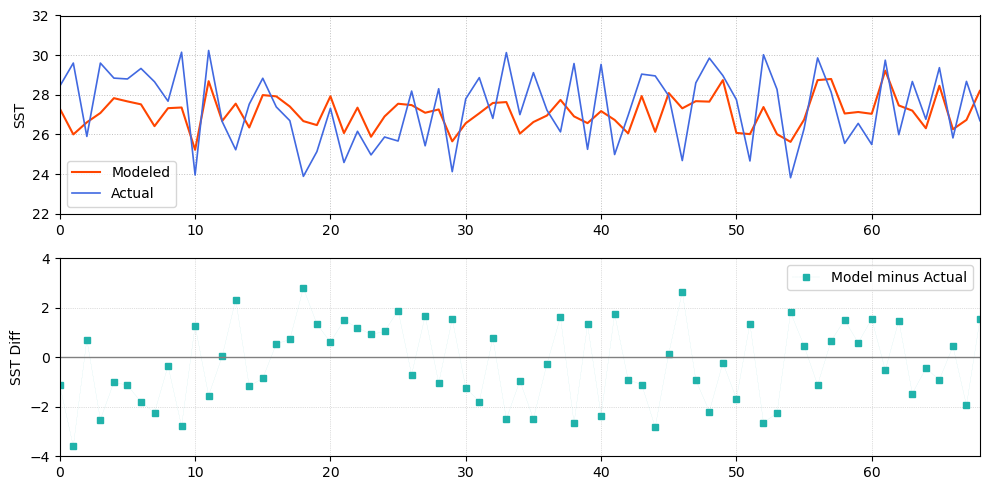

In [11]:
# Plot findings using two subplots (2 rows, 1 column)
fig2, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot Actual and Modeled SST values
ax[0].plot(lin_df.index, lin_df['Modeled'],linestyle='-', c='orangered', linewidth=1.5, label='Modeled')
ax[0].plot(lin_df.index, lin_df['Actual'], linestyle='-', c='royalblue', linewidth=1.2, label='Actual')
# Set the x and y axes
ax[0].set_xlim(0, 68)  
ax[0].set_ylim(22,32)
# Format your line plot
ax[0].grid(True, color='silver', linestyle=':', linewidth=0.7)
ax[0].set_ylabel('SST')
ax[0].legend()

# Plot SST_diff values
ax[1].plot(lin_df.index, lin_df['SST_diff'], linestyle=':', linewidth = 0.1, marker = 's', markersize = 5, 
           color = 'lightseagreen', label = 'Model minus Actual')
# Set the x and y axes
ax[1].set_xlim(0, 68)  
ax[1].set_ylim(-4, 4)
# Add thick line at 0 to highlight differences in SST
ax[1].axhline(y = 0, color = 'grey', linewidth = 1.0)
# Format your line plot
ax[1].grid(True, color='silver', linestyle=':', linewidth= 0.5)
ax[1].set_ylabel('SST Diff')
ax[1].legend()

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert" 
     style="font-size: 1em; padding: 10px; margin: 10px 0; text-align: center;">
    
    At this early stage, we can't be sure if the fit between SST and SSH is so poor because SSH is the wrong predictor/ variable, or if it's due to non-linearity. Maybe both!
<div>